In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('data/order-of-australia.csv')
df.head()

,field,percent_male
0,Architecture,100
1,Building and Construction,100
2,Business & Commerce,55
3,Community,62
4,Community - Multicultural Affairs,73


In [6]:
df['percent_female'] = 100 - df.percent_male
df.head()

,field,percent_male,percent_female
0,Architecture,100,0
1,Building and Construction,100,0
2,Business & Commerce,55,45
3,Community,62,38
4,Community - Multicultural Affairs,73,27


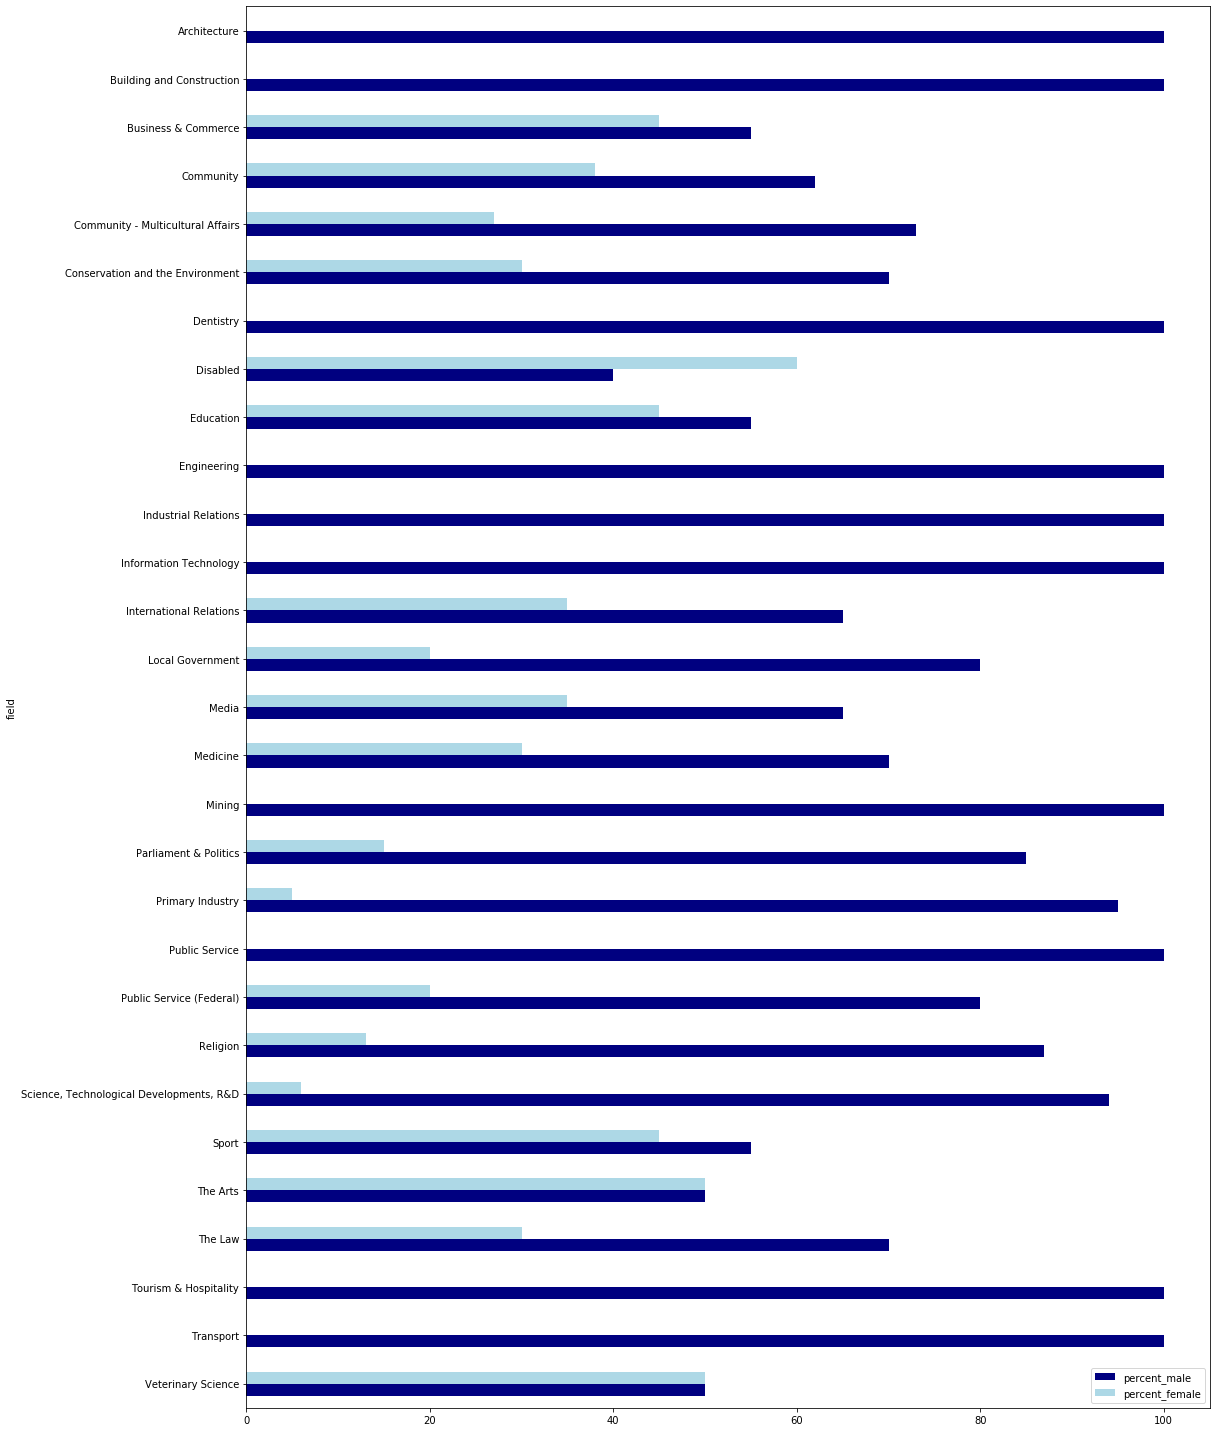

In [22]:
df.sort_values('field', ascending = False).plot(x = 'field', 
                                                y = ['percent_male', 'percent_female'], 
                                                kind = 'barh', 
                                                figsize = (17, 20), 
                                                color = ['navy', 'lightblue'])


plt.tight_layout()
plt.savefig("output.pdf")

In [6]:
df = pd.read_csv('data/oxfam.csv')

In [7]:
df.head()

,rank,metric,dist_from_avg_rank
0,28,Spending (overall),48
1,31,Tax (overall),45
2,5,Labour,64
3,109,Education,-30
4,71,Health,5


In [8]:
df.dist_from_avg_rank.describe()

count    12.000000
mean     31.000000
std      32.479364
min     -30.000000
25%      14.000000
50%      42.500000
75%      53.500000
max      70.000000
Name: dist_from_avg_rank, dtype: float64

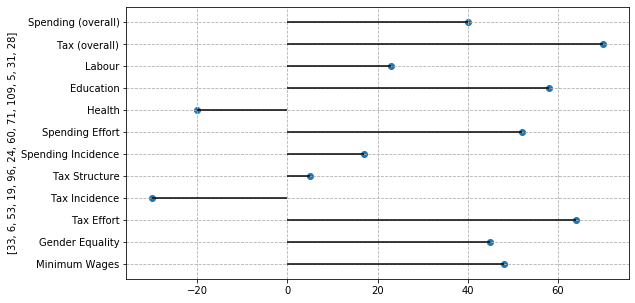

In [18]:
fig, ax = plt.subplots(figsize = (9, 5))
ax.hlines(xmin = 0, 
          xmax = df.dist_from_avg_rank, 
          y = df.sort_index(ascending = False).metric)
ax.scatter(x = df.dist_from_avg_rank, y = df.sort_index(ascending = False).metric)

ax.set_ylabel(df.sort_index(ascending = False)['rank'].tolist())
ax.grid(linestyle = '--')

# plt.tight_layout()
plt.savefig("output_wgrid.pdf")

In [44]:
df.sort_index(ascending = True)

,rank,metric,dist_from_avg_rank
0,28,Spending (overall),48
1,31,Tax (overall),45
2,5,Labour,64
3,109,Education,-30
4,71,Health,5
5,60,Spending Effort,17
6,24,Spending Incidence,52
7,96,Tax Structure,-20
8,19,Tax Incidence,58
9,53,Tax Effort,23


In [61]:
df['rank']

0      28
1      31
2       5
3     109
4      71
5      60
6      24
7      96
8      19
9      53
10      6
11     33
Name: rank, dtype: int64

In [2]:
df = pd.read_csv('data/commute.csv')

In [4]:
df

,country,source,destination,distance,pct_wages
0,UK,Luton,London St Pancras,35,14.0
1,UK,Liverpool Lime St,Manchester Piccadilly,32,10.6
2,Germany,Brandenburg,Berlin,43,7.9
3,Finland,Karis,Helsinki,47,6.6
4,Sweden,Uppsala,Stockholm,45,6.4
5,Ireland,Drogheda,Dublin,29,6.2
6,Norway,Moss,Oslo,39,4.0
7,Spain,Aranjuez,Madrid,31,3.9
8,Italy,Anzio,Rome,31,3.1
9,France,Mantes-la-Jolie,Paris,34,2.4


In [15]:
df['commute'] = df.source + ' - ' + df.destination
df['pct_wages_r'] = df['pct_wages'].astype(str) + '%'

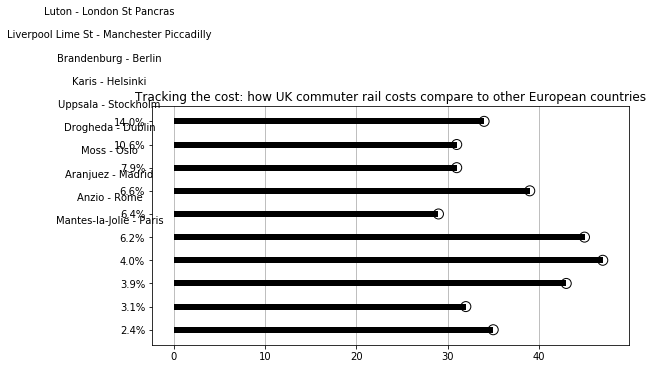

In [100]:

fig, ax = plt.subplots(figsize = (9, 5))
ax.hlines(xmin = 0, 
          xmax = df.distance, 
          y = df.sort_index(ascending = False).pct_wages_r, lw = 6)

ax.grid(axis = 'x')
ax.set_title('Tracking the cost: how UK commuter rail costs compare to other European countries')
ax.scatter(x = df.distance, 
           y =  df.sort_index(ascending = False).pct_wages_r, s = 100, 
           edgecolors = 'black', 
           facecolors = 'none')
ax.set_ylabel('\n\n'.join(df.commute.tolist()), rotation = 0)

plt.tight_layout()
plt.savefig("output.pdf")